In [3]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In the below code block we are loading the dataset.

In [36]:
data=pd.read_csv('spam.csv')
df = data
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
data.columns

Index(['Category', 'Message'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [8]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


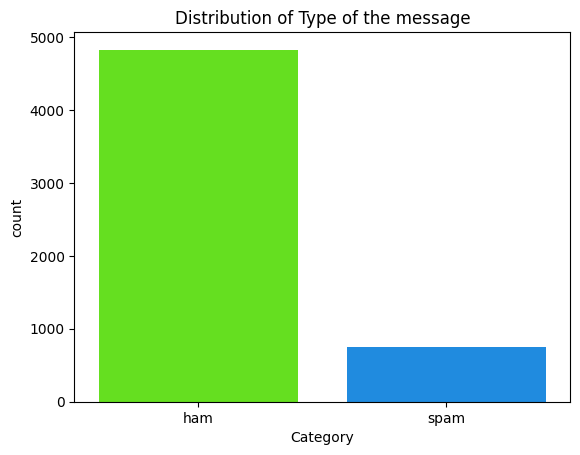

In [11]:
 # Distribution of type of messages
ax = sns.countplot(x='Category',data=data,palette='gist_rainbow').set(title='Distribution of Type of the message')
plt.show()


In [13]:
 # Percentage of Spam and Ham
ham = (data.Category.value_counts()[0]/5572)*100
spam = (data.Category.value_counts()[1]/5572)*100
print(f'Percentage of Ham in this dataset {ham.round(2)}%')
print(f'Percentage of Spam in this dataset {spam.round(2)}%')


Percentage of Ham in this dataset 86.59%
Percentage of Spam in this dataset 13.41%


In [14]:
#Length of the Content
data['Message Length'] = data['Message'].apply(len)
data.head()


,Category,Message,Message Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


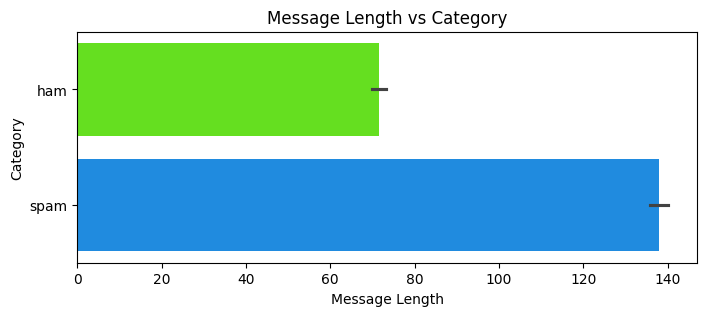

In [15]:
#Content Length vs Type
figsize = (8, 3)
plt.figure(figsize=figsize)
sns.barplot(data, x='Message Length', y='Category', palette='gist_rainbow').set(title='Message Length vs Category')
plt.show()


From Above plot we can see spam messages are high in length compared to ham messages


#Text preprocessing

In [16]:
# Encoding of Type Column
le = LabelEncoder()
le.fit(data['Category'])
data['Encoded Type'] = le.transform(data['Category'])

 # spliting the data
X = data['Message']
y = data['Encoded Type']

 # Vectorization on description column using Tf idf Vectorizer
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(X)
x_vector = x.toarray()


In [18]:
# DataFrame after Vectorization
pd.DataFrame(data=x_vector,columns=vectorizer.get_feature_names_out()).head()

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
 # Train Test split
X_train,X_test,y_train,y_test = train_test_split(x_vector,y,test_size=0.2,random_state=0)
X_train.shape

(4457, 8709)

#Model Building



#1. Naive Bayes

In [21]:
model_MNB = MultinomialNB()
model_MNB.fit(X_train,y_train)
print('Training set Score :',model_MNB.score(X_train,y_train))
print('Test set Score :',model_MNB.score(X_test,y_test))


Training set Score : 0.9672425398249944
Test set Score : 0.9614349775784753


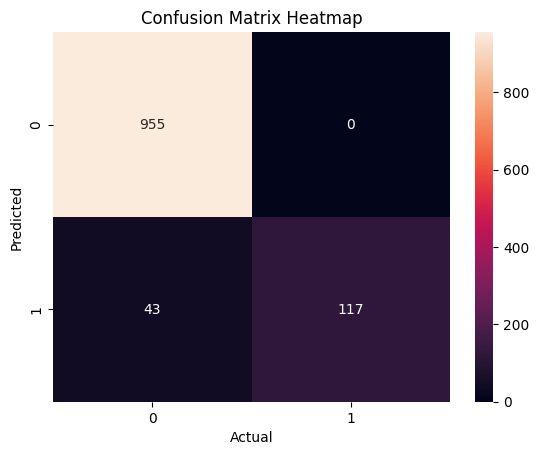

In [22]:
 # Confusion Matrix
y_pred = model_MNB.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [23]:
# Classification Report
cr = classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       955
           1       1.00      0.73      0.84       160

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



#2. Logistic regression

In [30]:
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
print('Training set Score :',model_lr.score(X_train,y_train))
print('Test set Score :',model_lr.score(X_test,y_test))


Training set Score : 0.9741978909580435
Test set Score : 0.9596412556053812


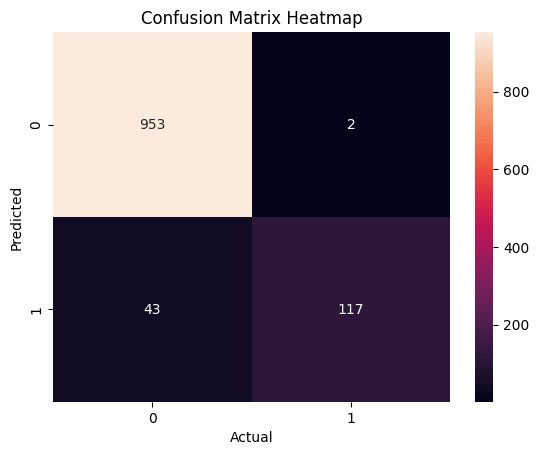

In [25]:
# Confusion Matrix
y_pred = model_lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [26]:
 # Classification Report
cr = classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       955
           1       0.98      0.73      0.84       160

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



#3. SVM

In [27]:
model_svm = SVC()
model_svm.fit(X_train,y_train)
print('Training set Score :',model_svm.score(X_train,y_train))
print('Test set Score :',model_svm.score(X_test,y_test))


Training set Score : 0.99798070450976
Test set Score : 0.9802690582959641


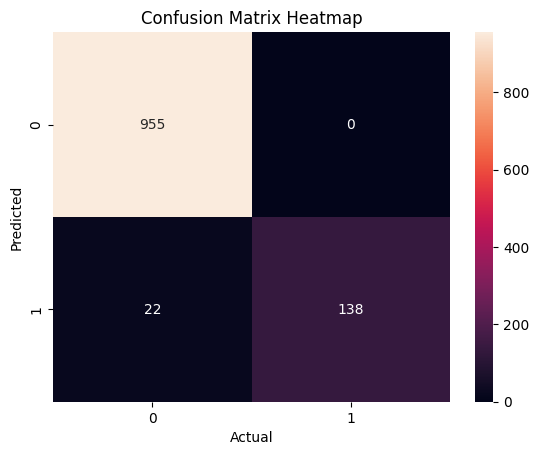

In [28]:
 # Confusion Matrix
y_pred = model_svm.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='.0f').set(title='Confusion Matrix Heatmap')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [29]:
 # Classification Report
cr = classification_report(y_test,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       955
           1       1.00      0.86      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Naive Bayes Have three Classifier(Bernouli,Multinominal,Gaussian) Here I use Multinominal Bayes Because here data in a discrete form discrete data(e.g movie ratings ranging 1 to 5 as each rating will have certain frequency to represent)

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Category,test_size=0.25)

In [41]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [42]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

Here I given Two email Two detect 1st One is looking good and the other one looking spam

In [43]:
emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [44]:
clf.predict(emails)

array(['ham', 'spam'], dtype='<U4')

In [45]:
clf.score(X_test,y_test)

0.9834888729361091

#Predictions:

In [48]:
text = ['Bored housewives! Chat n date now! 0871750.77.11! BT-national rate 10p/min only from landlines!','Let Ur Heart Be Ur Compass Ur Mind Ur Map Ur Soul Ur Guide And U W ill Never loose in world....gnun - Sent via WAY2SMS.COM']

In [49]:
test = vectorizer.transform(text)
test_dense = test.toarray()


In [50]:
 # MultinomialNB
model_MNB.predict(test_dense)


array([1, 0])

In [51]:
 # Logistic Regression
model_lr.predict(test_dense)

array([1, 0])

In [52]:
 # SVM
model_svm.predict(test_dense)

array([1, 0])

Here in the above 1 indicates that the message is a spam message and the 0 indicates that message is ham which is not a spam.